In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
data = pd.read_csv("Wholesale customers data.csv")
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
mu_cols = ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Grocery','Delicassen']
data[mu_cols].head()

,Fresh,Milk,Frozen,Detergents_Paper,Grocery,Delicassen
0,12669,9656,214,2674,7561,1338
1,7057,9810,1762,3293,9568,1776
2,6353,8808,2405,3516,7684,7844
3,13265,1196,6404,507,4221,1788
4,22615,5410,3915,1777,7198,5185


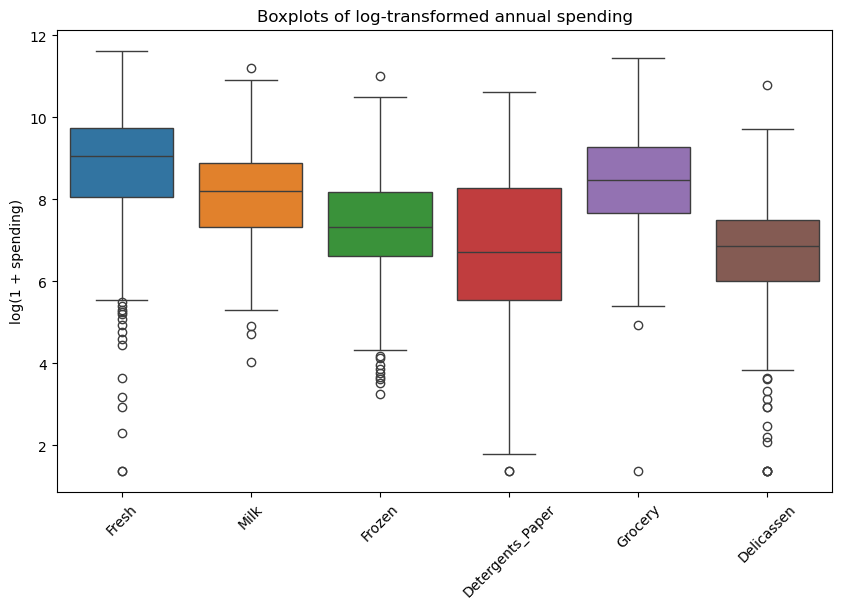

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=np.log1p(data[mu_cols]))  # log1p = log(1 + x)
plt.title("Boxplots of log-transformed annual spending")
plt.ylabel("log(1 + spending)")
plt.xticks(rotation=45)
plt.show()



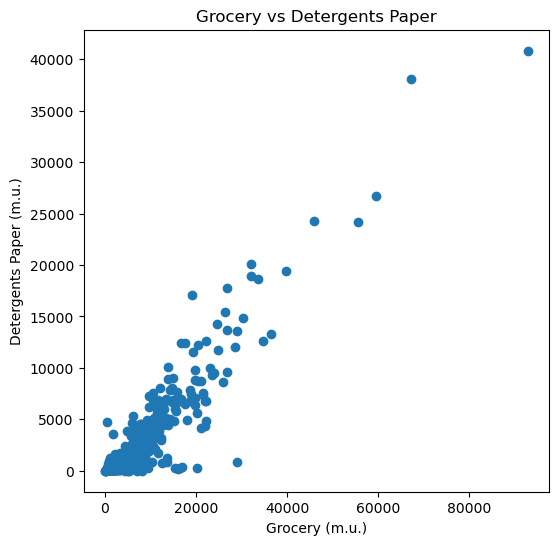

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(data['Grocery'], data['Detergents_Paper'])
plt.xlabel('Grocery (m.u.)')
plt.ylabel('Detergents Paper (m.u.)')
plt.title('Grocery vs Detergents Paper')
plt.show()



In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Grocery', 'Detergents_Paper']])


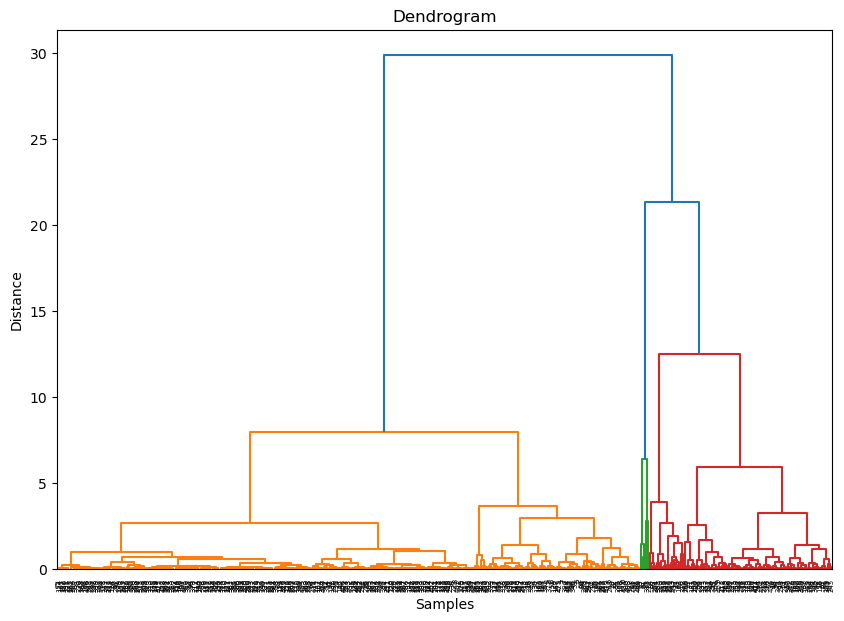

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

#Jag valde 3 kluster eftersom dendrogrammet visar tre tydliga huvudgrenar när man skär trädet på en nivå där avståndet mellan hopslagningar ökar kraftigt.


In [12]:
from sklearn.cluster import AgglomerativeClustering

# Vi väljer 3 kluster efter dendrogrammet
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')

labels = cluster.fit_predict(scaled_data)


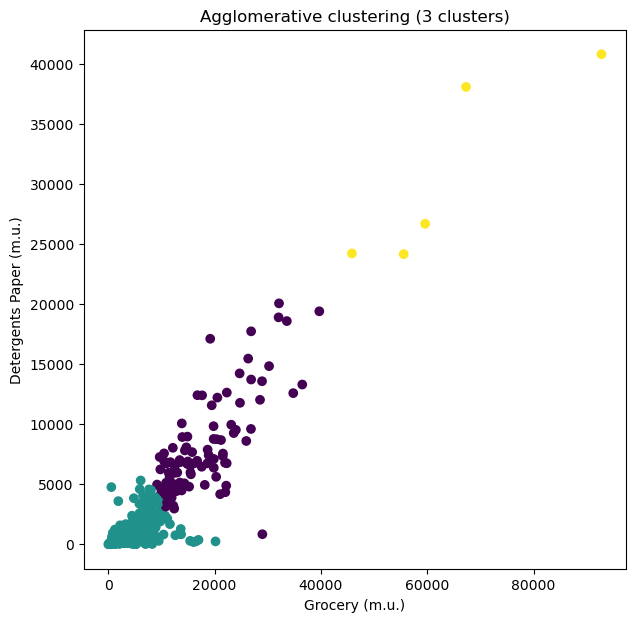

In [16]:
plt.figure(figsize=(7,7))
plt.scatter(data['Grocery'], data['Detergents_Paper'], c=labels)
plt.xlabel('Grocery (m.u.)')
plt.ylabel('Detergents Paper (m.u.)')
plt.title('Agglomerative clustering (3 clusters)')
plt.show()

In [14]:
data_clusters = data.copy()
data_clusters['cluster'] = labels

data_clusters.groupby('cluster')[['Grocery', 'Detergents_Paper']].mean()


,Grocery,Detergents_Paper
cluster,,
0,17486.519231,7782.548077
1,4105.404834,919.758308
2,64215.000000,30806.400000
